In [167]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
%matplotlib notebook

In [168]:
def cart2elaz(pt):
    x, y, z = pt[0], pt[1], pt[2]
    XsqPlusYsq = x**2 + y**2
    r = math.sqrt(XsqPlusYsq + z**2)                # r
    elev = math.atan2(z, math.sqrt(XsqPlusYsq))     # theta
    az = math.atan2(y,x)                            # phi
    return r, elev, az

def elaz2cart(r, elev, az):
    x = r * math.cos(az) * math.cos(elev)
    y = r * math.sin(az) * math.cos(elev)
    z = r * math.sin(elev)
    return np.array((x, y, z))

def conicalPositionMethod1(azCentre, elCentre, radius, scanAngle):
    R = 1

    conicalVec = np.array(elaz2cart(radius, scanAngle, 1.0))
    a = elaz2cart(azCentre, elCentre , 1.0)

    g = 1.0 - a[2]
    rMat = np.zeros((3, 3))
    
    rMat[0, 0] = 1.0 - g * a[0] * a[0]
    rMat[0, 1] = g * a[0] * a[1]
    rMat[0, 2] = a[0]
    rMat[1, 0] = g * a[0] * a[1]
    rMat[1, 1] = 1.0 - g * a[1] * a[1]
    rMat[1, 2] = -a[1]
    rMat[2, 0] = -a[0]
    rMat[2, 1] = -a[1]
    rMat[2, 2] = 1.0 - g * (a[0] * a[0] - a[1] * a[1])

    conicalVec = rMat @ conicalVec 

    return cart2elaz(conicalVec)

def conicalPositionLocals(azCentre, elCentre, distance = 1.0):
    boresightVec = elaz2cart(distance, elCentre, azCentre)
    iVec = np.array([1, 0, 0])
    jVec = np.array([0, 1, 0])
    iVecLocal = np.cross(jVec, boresightVec)
    jVecLocal = np.cross(boresightVec, iVecLocal)
    return iVecLocal, jVecLocal

def conicalPositionMethod2(azCentre, elCentre, radius, scanAngle, distance = 1.0):
    boresightVec = elaz2cart(distance, elCentre, azCentre)
    iVec = np.array([1, 0, 0])
    jVec = np.array([0, 1, 0])
    iVecLocal = np.cross(jVec, boresightVec)
    jVecLocal = np.cross(boresightVec, iVecLocal)
    r = distance*math.tan(radius)

    point = boresightVec + r*math.cos(scanAngle)*iVecLocal + r*math.sin(scanAngle)*jVecLocal
    return point

point (el, az) = (-20.0, 0.0)
point (el, az) = (-19.939564993777154, 1.9331958167565446)
point (el, az) = (-19.758641328168224, 3.856391184195878)
point (el, az) = (-19.458363778203648, 5.759767029892623)
point (el, az) = (-19.040593274698498, 7.633857035488181)
point (el, az) = (-18.507873350763138, 9.46969998449394)
point (el, az) = (-17.863372922957133, 11.258965841958847)
point (el, az) = (-17.11081868773763, 12.994050673485674)
point (el, az) = (-16.254420758916147, 14.66813808714418)
point (el, az) = (-15.298795203145984, 16.275227365558006)
point (el, az) = (-14.248886887064216, 17.810130582607105)
point (el, az) = (-13.109895597751073, 19.268442597691404)
point (el, az) = (-11.887207816296813, 20.646488820343627)
point (el, az) = (-10.58633588999581, 21.9412560601014)
point (el, az) = (-9.212865728154473, 23.1503117081424)
point (el, az) = (-7.772413588635223, 24.27171606217849)
point (el, az) = (-6.2705920571924425, 25.303931938049327)
point (el, az) = (-4.7129849623154945, 26

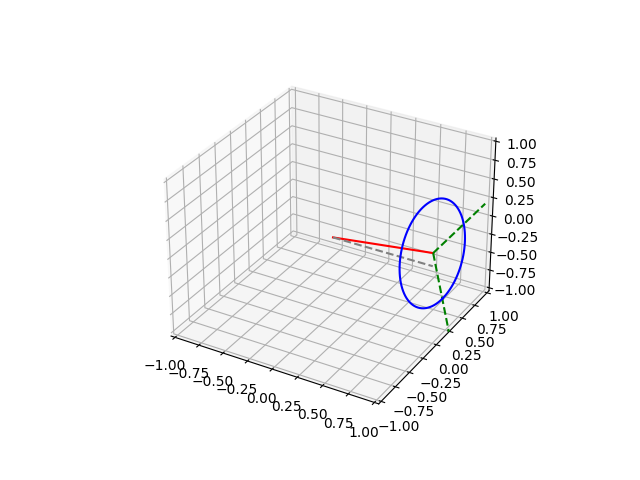

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(-1.0, 1.0)

# Cone parameters
azCentre = math.radians(0)
elCentre = math.radians(10)
radius = math.radians(30)
distance = 1.0

plot_boresight = True
plot_boresight_proj = True
plot_locals = True
plot_circle = True

# Plot the boresight vector
if plot_boresight:
    xline, yline, zline = [0], [0], [0]
    boresightVec = elaz2cart(1.0, elCentre, azCentre)
    xline.append(boresightVec[0])
    yline.append(boresightVec[1])
    zline.append(boresightVec[2])
    ax.plot(xline, yline, zline, 'red')

# Plot the projected boresight vector onto the xy plane
if plot_boresight_proj:
    xline, yline, zline = [0], [0], [0]
    boresightVec = elaz2cart(1.0, elCentre, azCentre)
    xline.append(boresightVec[0])
    yline.append(boresightVec[1])
    zline.append(0)
    ax.plot(xline, yline, zline, 'grey', linestyle='dashed')

# Plot the local coordinate vectors
if plot_locals:
    iVecLocal, jVecLocal = conicalPositionLocals(azCentre, elCentre, distance)
    boresightVec = elaz2cart(1.0, elCentre, azCentre)

    xline, yline, zline = [boresightVec[0]], [boresightVec[1]], [boresightVec[2]]
    xline.append(boresightVec[0] + iVecLocal[0])
    yline.append(boresightVec[1] + iVecLocal[1])
    zline.append(boresightVec[2] + iVecLocal[2])
    ax.plot(xline, yline, zline, 'green', linestyle='dashed')

    xline, yline, zline = [boresightVec[0]], [boresightVec[1]], [boresightVec[2]]
    xline.append(boresightVec[0] + jVecLocal[0])
    yline.append(boresightVec[1] + jVecLocal[1])
    zline.append(boresightVec[2] + jVecLocal[2])
    ax.plot(xline, yline, zline, 'green', linestyle='dashed')

# Plot the circle
if plot_circle:
    scanAngle = np.linspace(0, 2*np.pi, 100)
    xline, yline, zline = [], [], []
    for angle in scanAngle:
        point = conicalPositionMethod2(azCentre, elCentre, radius, angle, distance)
        xline.append(point[0])
        yline.append(point[1])
        zline.append(point[2])

        r, el, az = cart2elaz(point)
        print(f'point (el, az) = ({math.degrees(el)}, {math.degrees(az)})')
    ax.plot(xline, yline, zline, 'blue')